### Check that fields from CPL hist file match those from MOM6

In [8]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot

In [9]:
path= '/glade/scratch/gmarques/bmom.e22.f09_t061_hycom1_N75.mct.surface_fluxes_check.006/run/'
grd = MOM6grid(path+'ocean.mom6.static.nc')

MOM6 grid successfully loaded... 



### Heat balance

#### After one month

In [10]:
# 006 - after one month, from cpl table: 1.97837641 W / m^2
heat = (1.9802198003404028E+25-1.9799489234574726E+25) / (grd.area_t.sum() * 3600. * 24 * 31.)
print(heat)
print(heat-1.97837641)

2.0001239693258164
0.02174755932581629


#### After one year

In [11]:
# 006 - after one year, from cpl table: -0.42071340 W / m^2
heat = (1.9792707112754814E+25-1.9799489234574726E+25) / (grd.area_t.sum() * 3600. * 24 * 365.)
print(heat)
print(heat+0.42071340)


-0.42532350765117294
-0.004610107651172923


### MOM6 data

In [13]:
#ds_mom =  xr.open_dataset(path+'ocean.mom6.snap_0001.nc')
sfc_mom =  xr.open_dataset(path+'ocean.mom6.sfc_0001.nc')
frc_mom =  xr.open_dataset(path+'ocean.mom6.frc_0001.nc')

/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


### Latent heat from fprec, frunoff and evap

In [ ]:
%matplotlib inline

latent_fprec = np.ma.masked_invalid(frc_mom.latent_fprec_diag.mean(dim='time').values)
latent_frunoff = np.ma.masked_invalid(frc_mom.latent_frunoff.mean(dim='time').values)
latent_evap = np.ma.masked_invalid(frc_mom.latent_evap.mean(dim='time').values)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')

xyplot(latent_fprec, grd.geolon, grd.geolat, grd.area_t, title='latent_fprec', 
       axis=ax1[0], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(latent_frunoff, grd.geolon, grd.geolat, grd.area_t, title='latent_frunoff', 
       axis=ax1[1], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(latent_evap, grd.geolon, grd.geolat, grd.area_t, title='latent_evap ', 
       axis=ax1[2], nbins=50, colormap=plt.cm.nipy_spectral)

/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### CPL history data

In [6]:
ds_cpl = xr.open_mfdataset(path+'bmom.e22.f09_t061_hycom1_N75.mct.surface_fluxes_check.006.cpl.hi.0001-01-01-?????.nc')

/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [7]:
#print(ds_cpl.time)

In [24]:
#ds_mom.heat_content_massout[n,:].plot()

In [9]:
n=10
net_heat_surface = np.ma.masked_invalid(ds_mom.net_heat_surface[n,:].values)
net_heat_coupler_mom1 = np.ma.masked_invalid(ds_mom.net_heat_coupler[n,:].values)
sen_mom = np.ma.masked_invalid(ds_mom.sensible[n,:].values)
lat_mom = np.ma.masked_invalid(ds_mom.latent[n,:].values)
sw_mom = np.ma.masked_invalid(ds_mom.SW[n,:].values)
lw_mom = np.ma.masked_invalid(ds_mom.LW[n,:].values)
melth_mom = np.ma.masked_invalid(ds_mom.seaice_melt_heat[n,:].values)
net_heat_coupler_mom2 = sen_mom + lat_mom + sw_mom + lw_mom + melth_mom
frazil_mom = np.ma.masked_invalid(ds_mom.frazil[n,:].values)


heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)
heat_pme_mom = np.ma.masked_invalid(ds_mom.Heat_PmE[n,:].values)

# mass
fprec_mom = np.ma.masked_invalid(ds_mom.fprec[n,:].values)
frunoff_mom = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)
evap_mom = np.ma.masked_invalid(ds_mom.evap[n,:].values)

#sst_mom = np.ma.masked_invalid(sfc_mom.SST[n,:].values)
#sss_mom = np.ma.masked_invalid(sfc_mom.SSS[n,:].values)

In [10]:
C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

In [11]:
n=10
# areas
domo_aream = np.ma.masked_invalid(ds_cpl.domo_aream[n,:].values)
domo_area = np.ma.masked_invalid(ds_cpl.domo_area[n,:].values)
norm = domo_aream/domo_area

# heat
lwdn_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_lwdn[n,:].values) * norm
sw_cpl  = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_swnet[n,:].values)* norm
lat_cpl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_lat[n,:].values)* norm
sen_cpl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_sen[n,:].values)* norm
lwup_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_lwup[n,:].values)* norm
melth_cpl=np.ma.masked_invalid(ds_cpl.x2oacc_Fioi_melth[n,:].values)* norm

# mass
rofi = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_rofi[n,:].values)* norm
snow = np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_snow[n,:].values)* norm
evap = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_evap[n,:].values)* norm
meltw = np.ma.masked_invalid(ds_cpl.x2oacc_Fioi_meltw[n,:].values)* norm
rain = np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_rain[n,:].values)* norm
rofl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_rofl[n,:].values)* norm

# net heat
net_heat_coupler_cpl = lwdn_cpl+sw_cpl+lat_cpl+lwup_cpl+melth_cpl + sen_cpl - \
                       (snow * latent_heat_fusion) - (rofi*latent_heat_fusion)


# o2x
q_cpl = np.ma.masked_invalid(ds_cpl.o2x_Fioo_q[n,:].values)
sst_cpl = np.ma.masked_invalid(ds_cpl.o2x_So_t[n,:].values) - 273.15
sss_cpl = np.ma.masked_invalid(ds_cpl.o2x_So_s[n,:].values) 

### SW

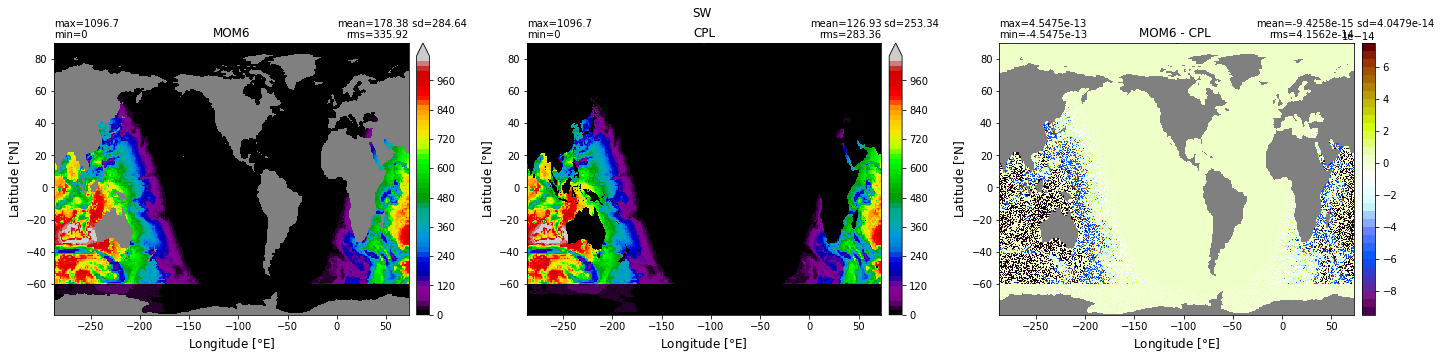

In [12]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')
xyplot(sw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,1057))
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,1057))
xyplot((sw_mom-sw_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL ', 
       axis=ax1[2])

### LW

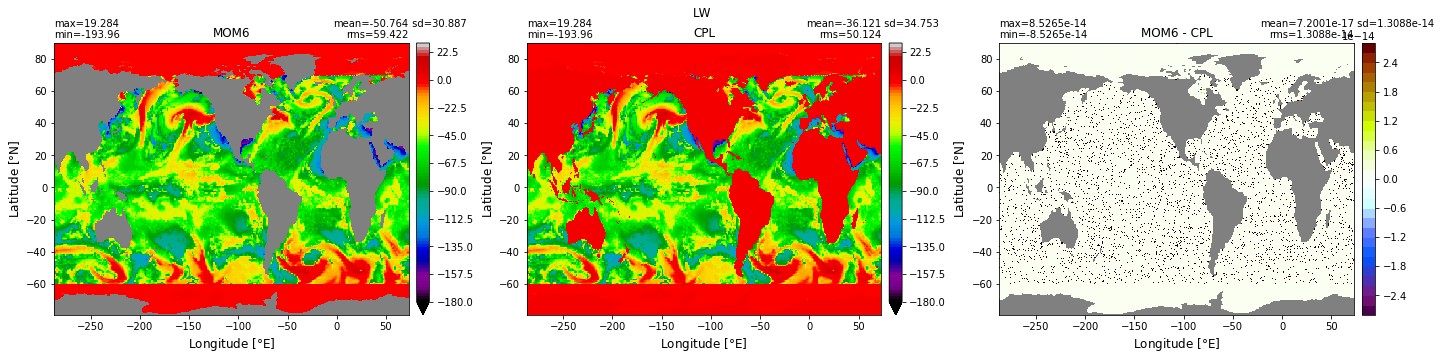

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('LW')
xyplot(lw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-180,30))
xyplot(lwdn_cpl+lwup_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-180,30))
xyplot((lw_mom-(lwdn_cpl+lwup_cpl)), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Sensible

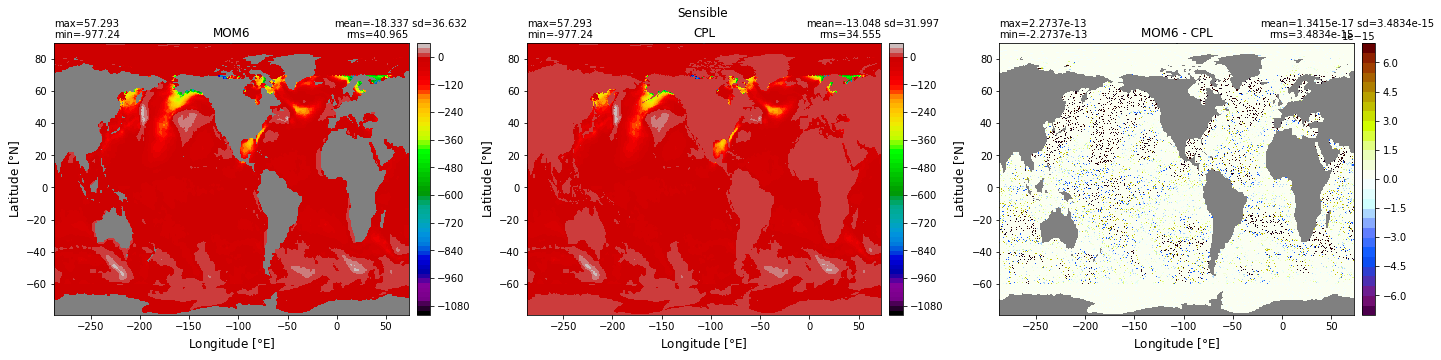

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Sensible')
xyplot(sen_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1110,60))
xyplot(sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1110,60))
xyplot((sen_mom-sen_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Latent
NOTE: 
* in MOM6, latent used to be = -(rofi * latent_heat_fusion) - (snow * latent_heat_fusion) + (evap * latent_heat_vapor); this has been corrected in this run
* in CPL,  latent = evap * latent_heat_vapor


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot(lat_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot(lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot((lat_mom-lat_cpl), grd.geolon, grd.geolat, grd.area_t, 
       title='MOM6 - CPL', 
       axis=ax1[2])

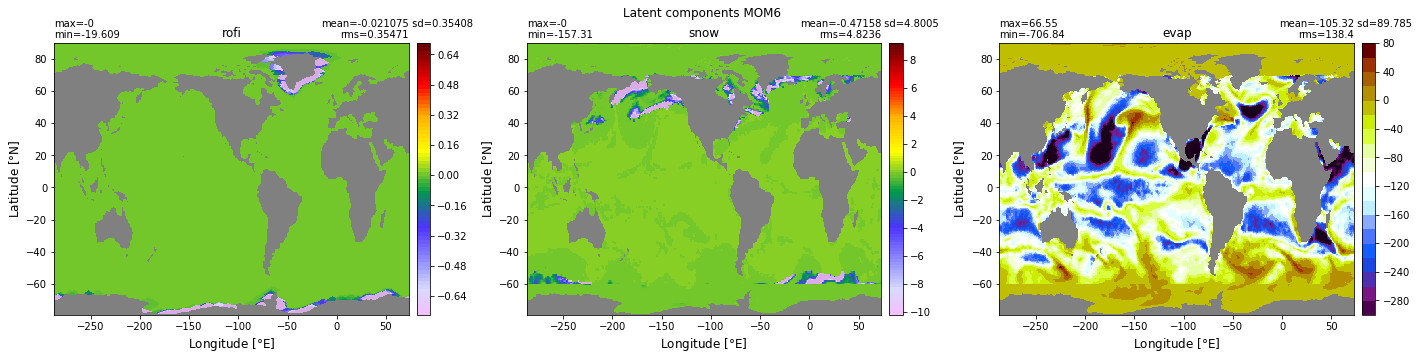

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent components MOM6')
xyplot((-frunoff_mom * latent_heat_fusion), grd.geolon, grd.geolat, grd.area_t, title='rofi', 
       axis=ax1[0], nbins=100)
xyplot((-fprec_mom * latent_heat_fusion), grd.geolon, grd.geolat, grd.area_t, title='snow', 
       axis=ax1[1], nbins=100)
xyplot((evap_mom * latent_heat_vapor), grd.geolon, grd.geolat, grd.area_t, title='evap', 
       axis=ax1[2])

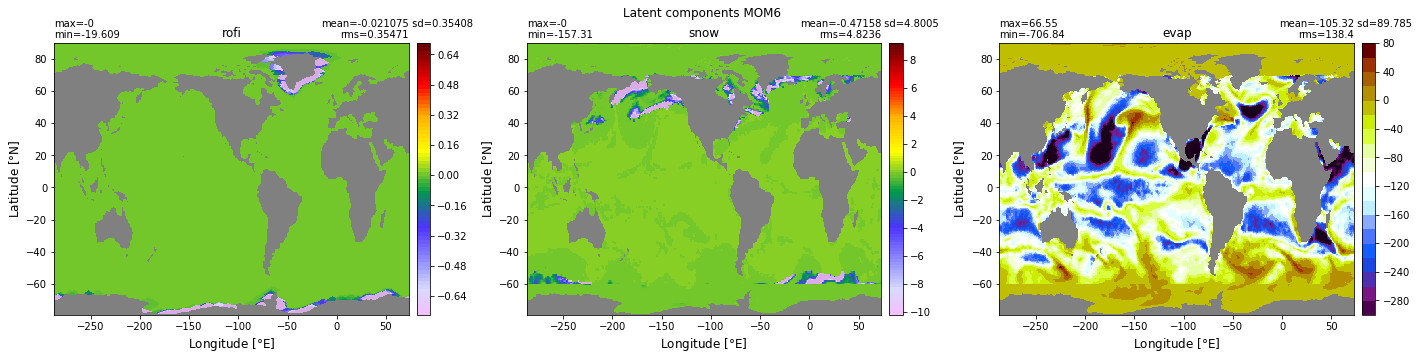

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent components MOM6')
dummy1 = np.ma.masked_where(grd.wet == 0, (-rofi * latent_heat_fusion))
xyplot(dummy1, grd.geolon, grd.geolat, grd.area_t, title='rofi', 
       axis=ax1[0], nbins=100)
dummy2 = np.ma.masked_where(grd.wet == 0, (-snow * latent_heat_fusion))
xyplot(dummy2, grd.geolon, grd.geolat, grd.area_t, title='snow', 
       axis=ax1[1], nbins=100)
dummy3 = np.ma.masked_where(grd.wet == 0, (evap * latent_heat_vapor))
xyplot(dummy3, grd.geolon, grd.geolat, grd.area_t, title='evap', 
       axis=ax1[2])

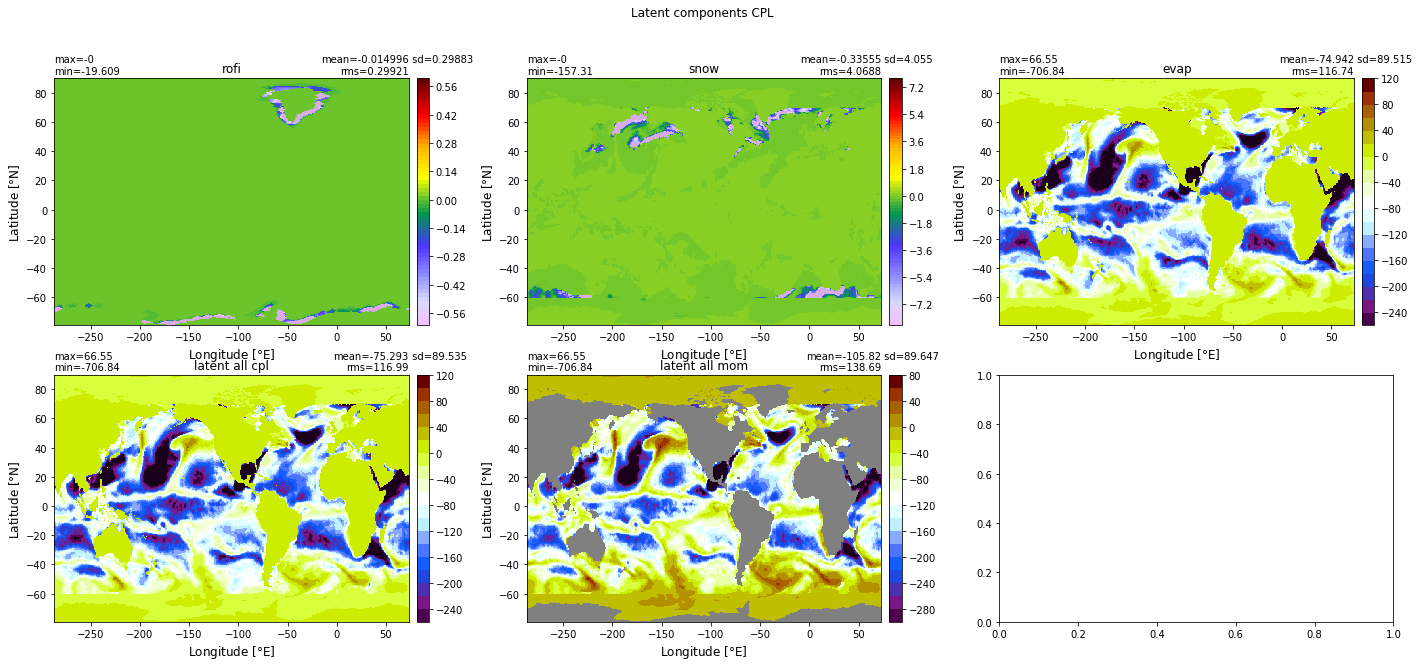

In [25]:
latent = (-(rofi * latent_heat_fusion ) -(snow * latent_heat_fusion) + (evap * latent_heat_vapor)) * grd.wet

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,10))
ax1 = ax.flatten()
plt.suptitle('Latent components CPL')
xyplot((-rofi * latent_heat_fusion)* grd.wet, grd.geolon, grd.geolat, grd.area_t, title='rofi', 
       axis=ax1[0], nbins=100)
xyplot((-snow * latent_heat_fusion)* grd.wet, grd.geolon, grd.geolat, grd.area_t, title='snow', 
       axis=ax1[1], nbins=100)
xyplot((evap * latent_heat_vapor)* grd.wet, grd.geolon, grd.geolat, grd.area_t, title='evap', 
       axis=ax1[2])
xyplot(latent, grd.geolon, grd.geolat, grd.area_t, title='latent all cpl', 
       axis=ax1[3])
xyplot(lat_mom, grd.geolon, grd.geolat, grd.area_t, title='latent all mom', 
       axis=ax1[4])

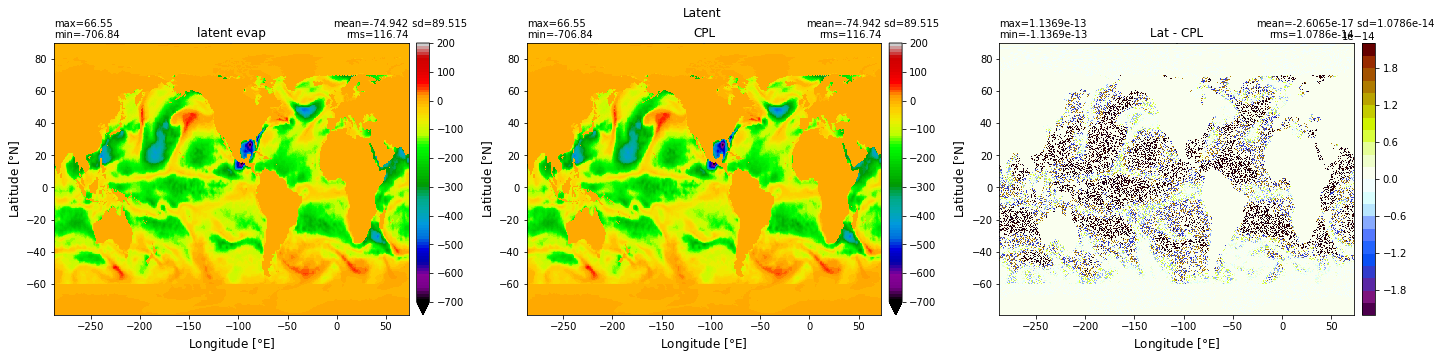

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot((evap * latent_heat_vapor)* grd.wet, grd.geolon, grd.geolat, grd.area_t, title='latent evap', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot(lat_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-700,200))
xyplot(((evap * latent_heat_vapor)-lat_cpl), grd.geolon, grd.geolat, grd.area_t, title='Lat - CPL', 
       axis=ax1[2])

### seaice_melt_heat

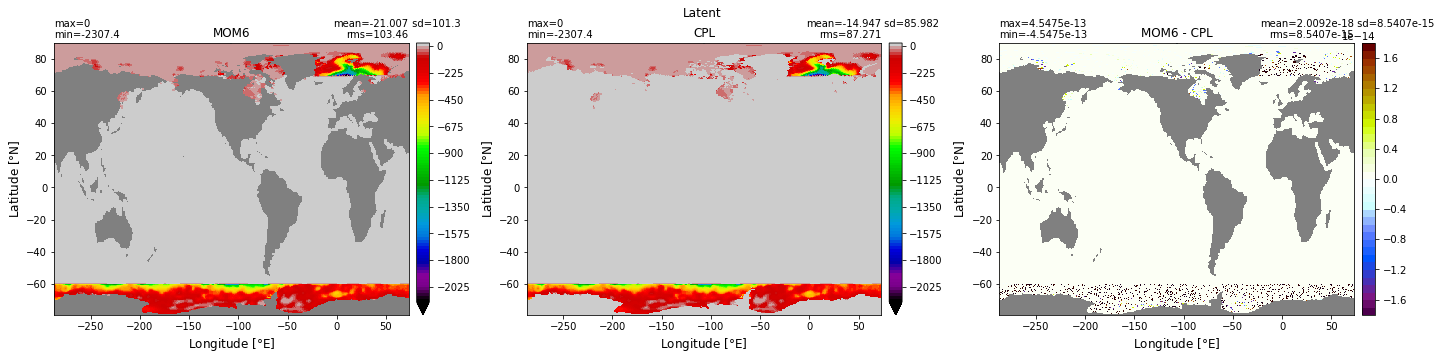

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Latent')
xyplot(melth_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2130,0.5))
xyplot(melth_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2130,0.5))
xyplot((melth_mom-melth_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Melt potential

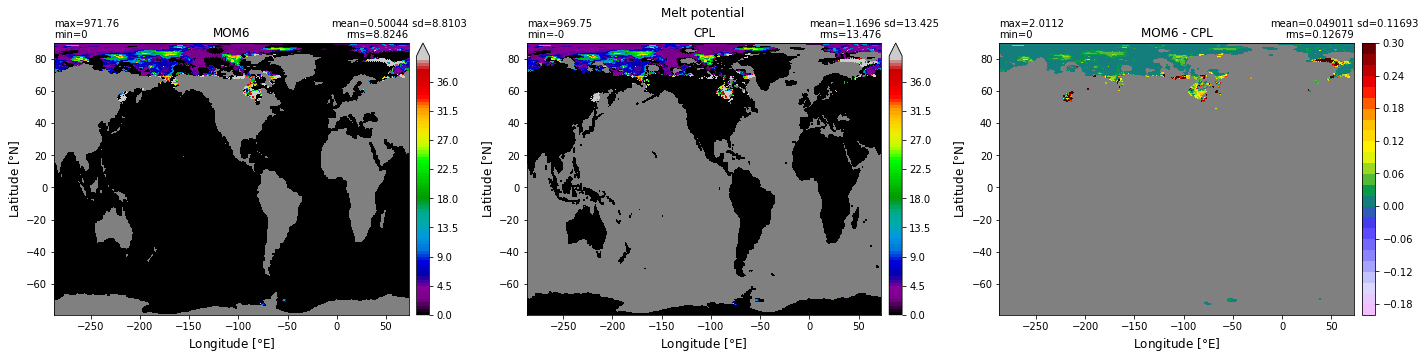

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
q_cpl_msk = np.ma.masked_where(q_cpl<0,q_cpl)
plt.suptitle('Melt potential')
xyplot(frazil_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,40))
xyplot(q_cpl_msk, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,40))
xyplot((frazil_mom-q_cpl_msk), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Sensible heat content due to mass added/removed

Components:
* rofl
* rofi 
* snow 
* evap 
* meltw 
* rain 

### rofl
NOTE: why we have negative rofl?

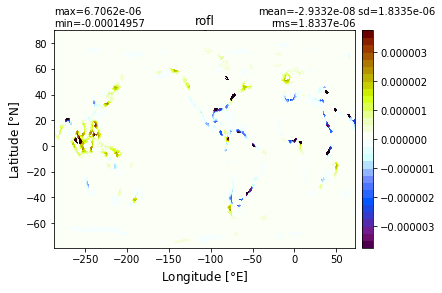

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(rofl, grd.geolon, grd.geolat, grd.area_t, title='rofl', axis=ax)

-0.0011098893388154273


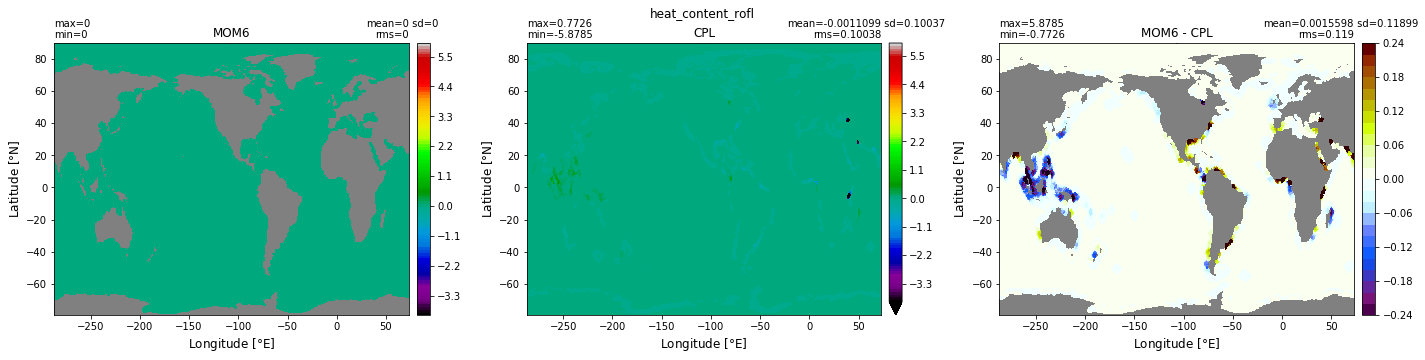

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_rofl = rofl * C_P * sst_cpl
plt.suptitle('heat_content_rofl')
xyplot(heat_content_lrunoff, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-4,6))
xyplot(heat_content_rofl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-4,6))
xyplot((heat_content_lrunoff-heat_content_rofl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

heat_content_rofl_ave = (heat_content_rofl*grd.area_t).sum() / grd.area_t.sum()
print(heat_content_rofl_ave)

### rofi

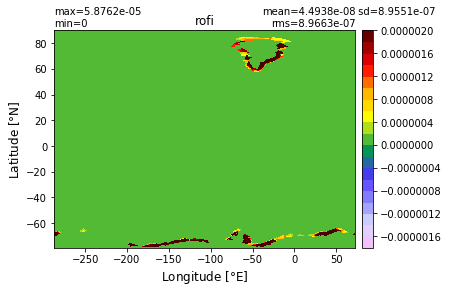

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(rofi, grd.geolon, grd.geolat, grd.area_t, title='rofi', axis=ax)

3.693245247007703e-18


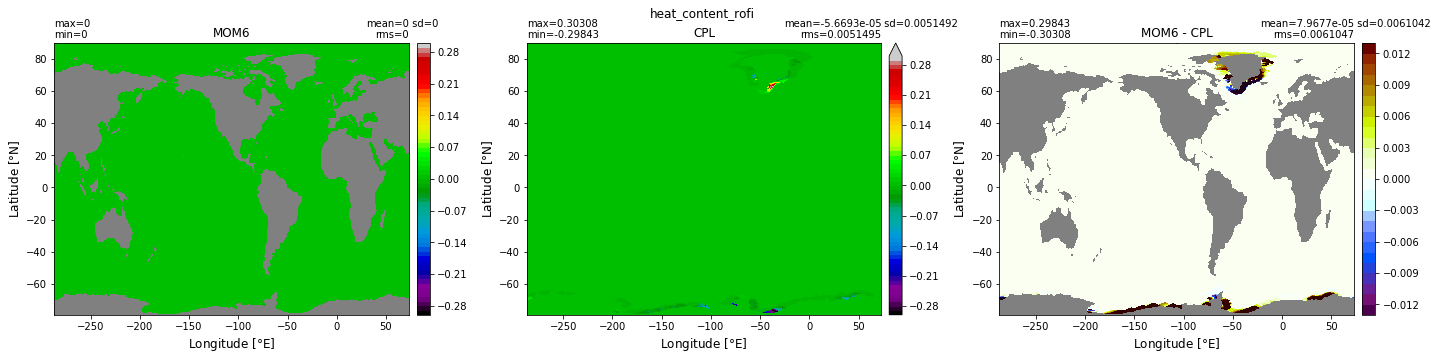

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_rofi = rofi * C_P * sst_cpl
plt.suptitle('heat_content_rofi')
xyplot(heat_content_frunoff, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-0.3,0.3))
xyplot(heat_content_rofi, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-0.3,0.3))
xyplot((heat_content_frunoff-heat_content_rofi), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

heat_pme_mom_ave = (heat_pme_mom*grd.area_t).sum() / grd.area_t.sum()
print(heat_pme_mom_ave)

### snow

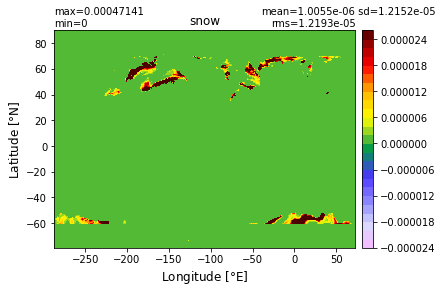

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(snow, grd.geolon, grd.geolat, grd.area_t, title='snow', axis=ax)

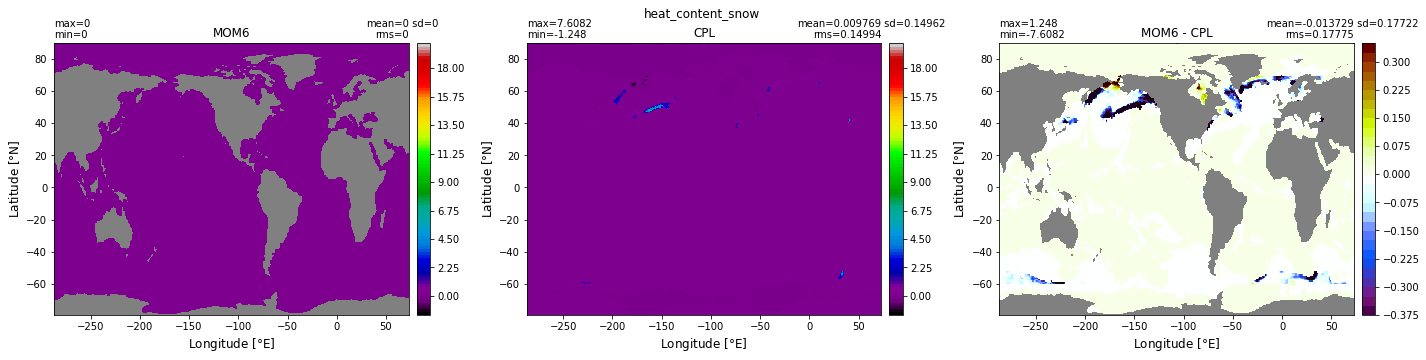

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_snow = snow * C_P * sst_cpl
plt.suptitle('heat_content_snow')
xyplot(heat_content_fprec, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot(heat_content_snow, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot((heat_content_fprec-heat_content_snow), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Evap

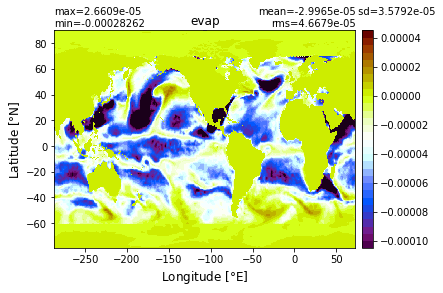

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(evap, grd.geolon, grd.geolat, grd.area_t, title='evap', axis=ax)

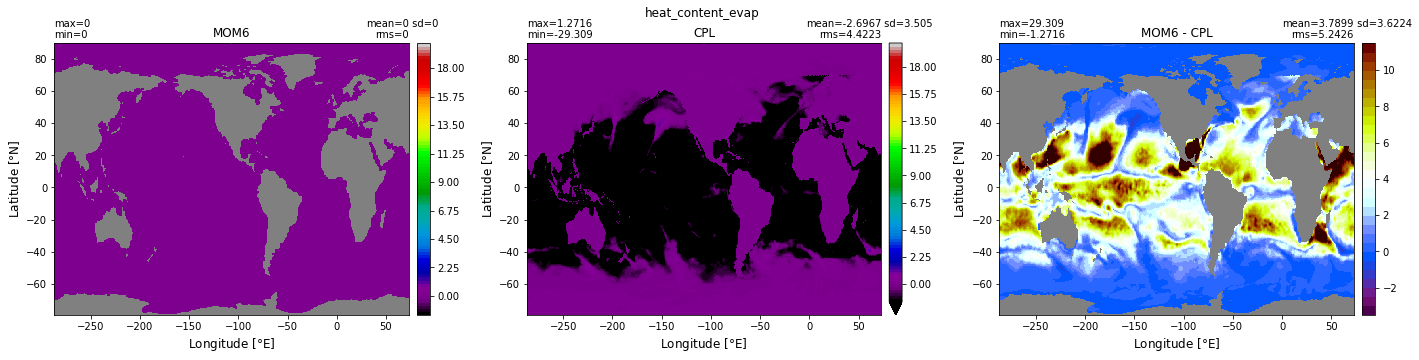

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_evap = evap * C_P * sst_cpl
#heat_content_evap = np.ma.masked_where(evap<0, dummy)

plt.suptitle('heat_content_evap')
xyplot(heat_content_cond, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot(heat_content_evap, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot((heat_content_cond-heat_content_evap), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### meltw
NOTE: MOM6 is only accounting for meltw > 0

https://github.com/NOAA-GFDL/MOM6/blob/f3483beeea796087342aaa059d066bec899ed201/src/core/MOM_forcing_type.F90#L770

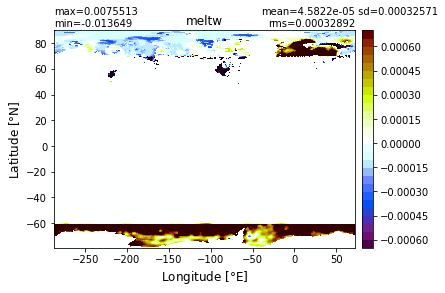

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(meltw, grd.geolon, grd.geolat, grd.area_t, title='meltw', axis=ax)

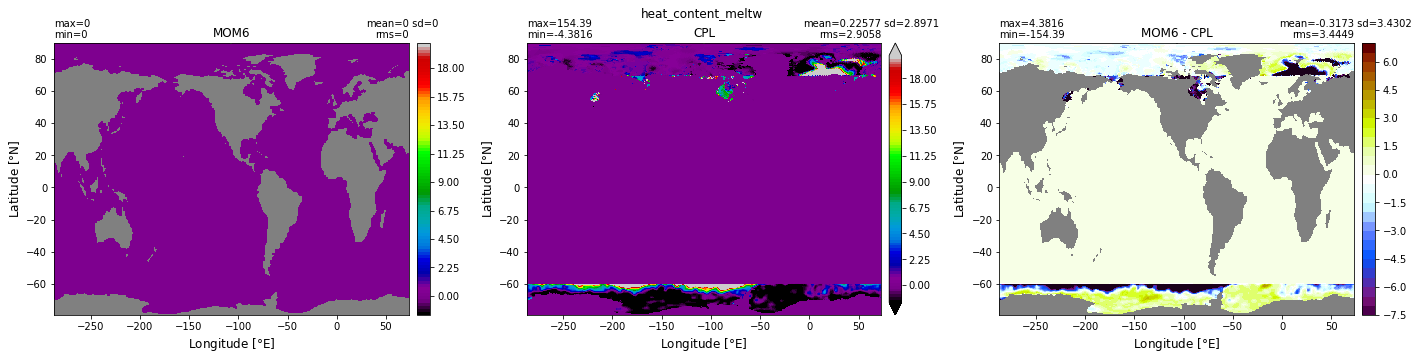

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_meltw = meltw * C_P * sst_cpl

plt.suptitle('heat_content_meltw')
xyplot(heat_content_icemelt, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot(heat_content_meltw, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,20))
xyplot((heat_content_icemelt-heat_content_meltw), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### rain

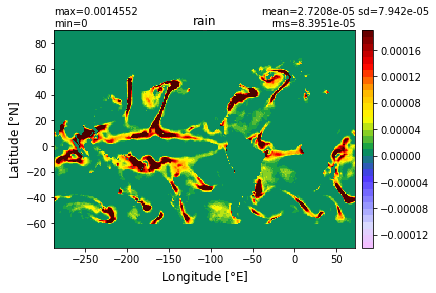

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1)
xyplot(rain, grd.geolon, grd.geolat, grd.area_t, title='rain', axis=ax)

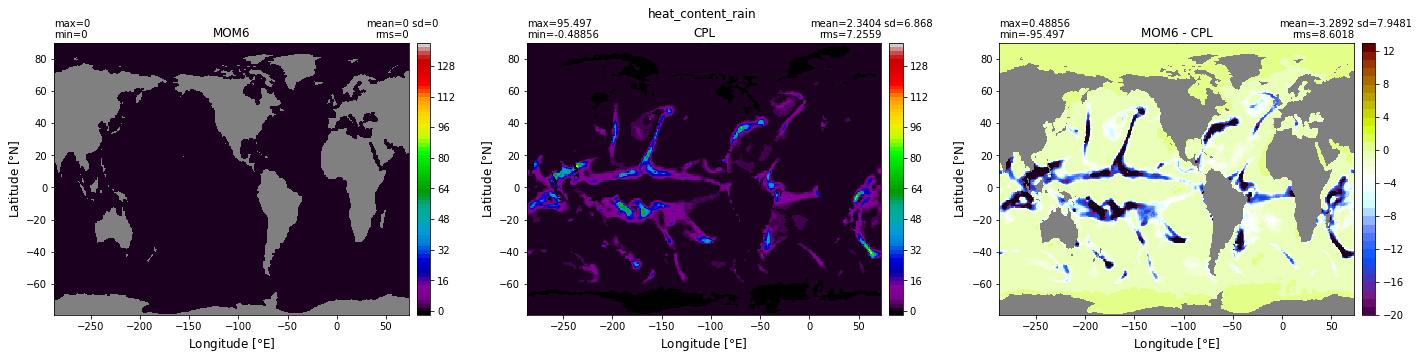

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
heat_content_rain = rain * C_P * sst_cpl

plt.suptitle('heat_content_rain')
xyplot(heat_content_lprec, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,140))
xyplot(heat_content_rain, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1.5,140))
xyplot((heat_content_lprec-heat_content_rain), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Check net_heat_coupler 
net_heat_coupler = SW+LW+latent+sensible+seaice_melt_heat

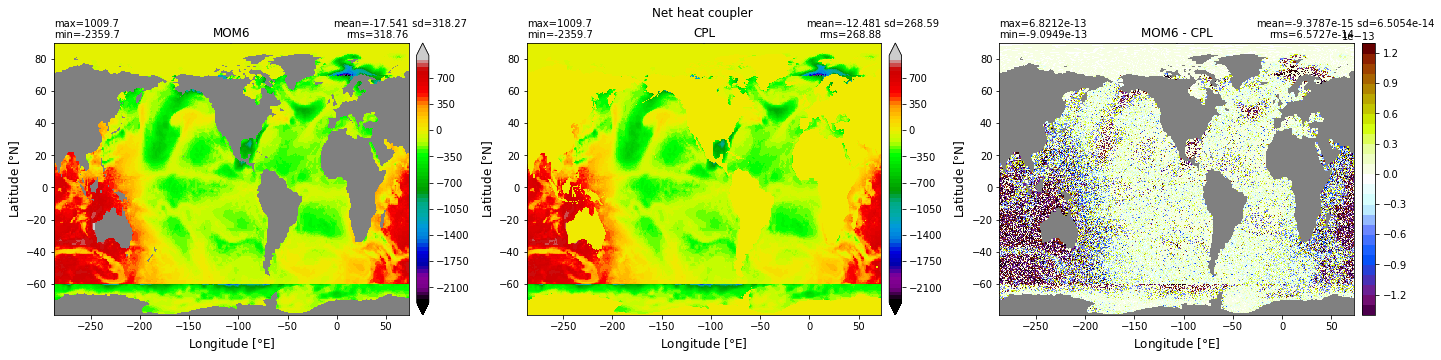

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Net heat coupler')
xyplot(net_heat_coupler_mom1, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot(net_heat_coupler_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot((net_heat_coupler_mom1-net_heat_coupler_cpl), grd.geolon, grd.geolat, grd.area_t, 
       title='MOM6 - CPL', 
       axis=ax1[2])

### self-consistency in MOM6

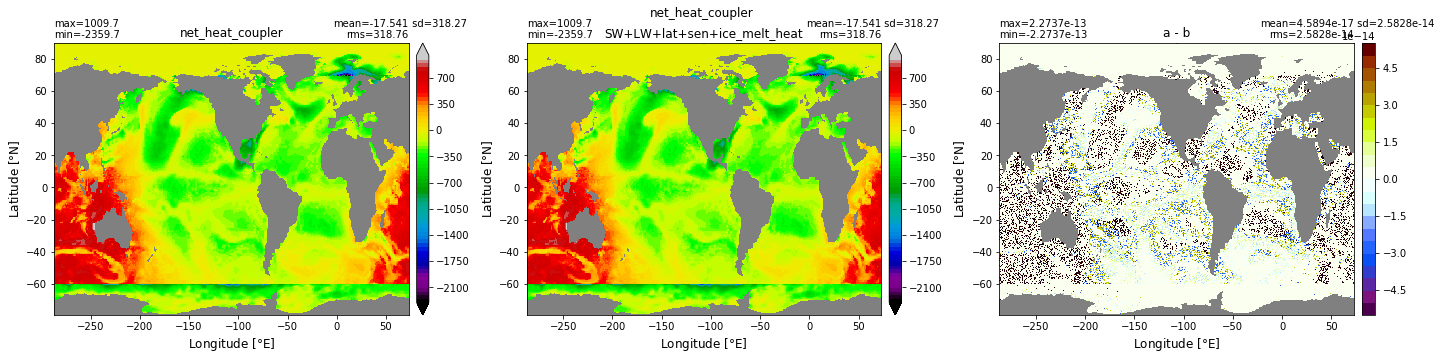

In [52]:

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('net_heat_coupler')
xyplot(net_heat_coupler_mom1, grd.geolon, grd.geolat, grd.area_t, title='net_heat_coupler', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot(net_heat_coupler_mom2, grd.geolon, grd.geolat, grd.area_t, title='SW+LW+lat+sen+ice_melt_heat', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot((net_heat_coupler_mom1-net_heat_coupler_mom2), grd.geolon, grd.geolat, grd.area_t, title='a - b', 
       axis=ax1[2])

### net_heat_surface - net heat coupler (from cpl)

This should give the difference between what the CPL expects the ocean receive and what the ocean actually receives.

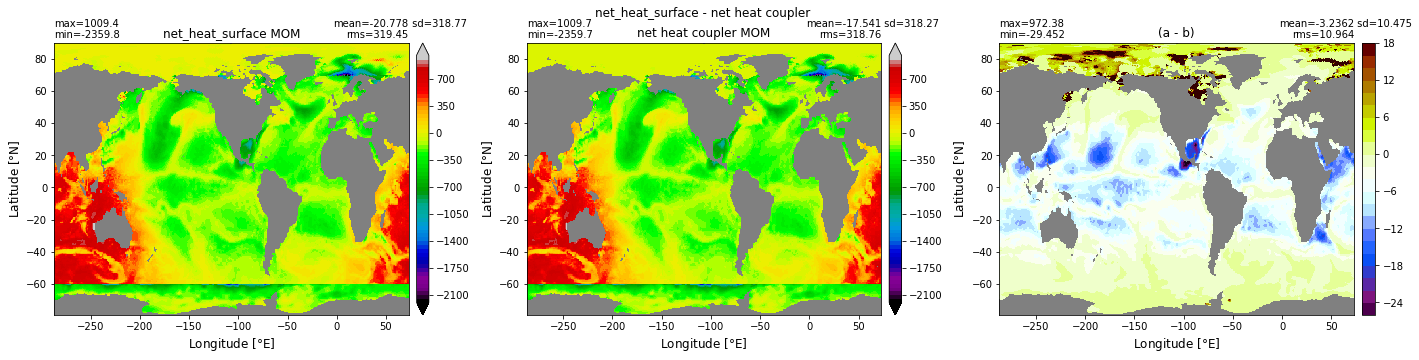

In [55]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('net_heat_surface - net heat coupler')
xyplot(net_heat_surface, grd.geolon, grd.geolat, grd.area_t, title='net_heat_surface MOM', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2200,1000))
xyplot(net_heat_coupler_mom1, grd.geolon, grd.geolat, grd.area_t, title='net heat coupler MOM', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2200,1000))
xyplot(net_heat_surface - net_heat_coupler_mom1, grd.geolon, grd.geolat, grd.area_t, 
       title='(a - b)', 
       axis=ax1[2])

### self-consistency in MOM6

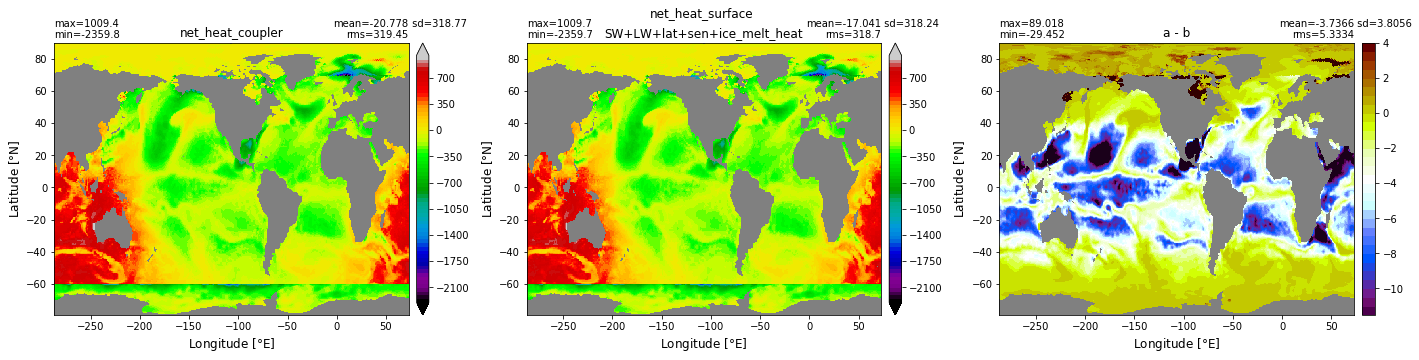

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('net_heat_surface')
net_heat_surface2 = net_heat_coupler_mom1 + heat_content_cond +  \
                    heat_content_fprec + heat_content_frunoff + heat_content_icemelt + \
                    heat_content_lprec + heat_content_lrunoff + frazil_mom

xyplot(net_heat_surface, grd.geolon, grd.geolat, grd.area_t, title='net_heat_coupler', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot(net_heat_surface2, grd.geolon, grd.geolat, grd.area_t, title='SW+LW+lat+sen+ice_melt_heat', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-2300,1000))
xyplot((net_heat_surface-net_heat_surface2), grd.geolon, grd.geolat, grd.area_t, title='a - b', 
       axis=ax1[2])

## Montly mean

In [25]:
cpl_ave = xr.open_dataset(path+'cpl.hi.avg.nc')

In [26]:
n=0
net_heat_surface = np.ma.masked_invalid(frc_mom.net_heat_surface[n,:].values)
net_heat_coupler_mom1 = np.ma.masked_invalid(frc_mom.net_heat_coupler[n,:].values)
sen_mom = np.ma.masked_invalid(frc_mom.sensible[n,:].values)
lat_mom = np.ma.masked_invalid(frc_mom.latent[n,:].values)
sw_mom = np.ma.masked_invalid(frc_mom.SW[n,:].values)
lw_mom = np.ma.masked_invalid(frc_mom.LW[n,:].values)
melth_mom = np.ma.masked_invalid(frc_mom.seaice_melt_heat[n,:].values)
net_heat_coupler_mom2 = sen_mom + lat_mom + sw_mom + lw_mom + melth_mom
frazil_mom = np.ma.masked_invalid(frc_mom.frazil[n,:].values)

# mass
fprec_mom = np.ma.masked_invalid(frc_mom.fprec[n,:].values)
frunoff_mom = np.ma.masked_invalid(frc_mom.frunoff[n,:].values)
evap_mom = np.ma.masked_invalid(frc_mom.evap[n,:].values)

latent_rofi = (frunoff_mom * latent_heat_fusion)
latent_evap = (evap_mom * latent_heat_vapor)
latent_fprec = (fprec_mom * latent_heat_fusion)

In [33]:
n=0
# areas
domo_aream = np.ma.masked_invalid(cpl_ave.domo_aream[n,:].values)
domo_area = np.ma.masked_invalid(cpl_ave.domo_area[n,:].values)
norm = domo_aream/domo_area

# heat
lwdn_cpl= np.ma.masked_invalid(cpl_ave.x2oacc_Faxa_lwdn[n,:].values) * norm
sw_cpl  = np.ma.masked_invalid(cpl_ave.x2oacc_Foxx_swnet[n,:].values)* norm
lat_cpl = np.ma.masked_invalid(cpl_ave.x2oacc_Foxx_lat[n,:].values)* norm
sen_cpl = np.ma.masked_invalid(cpl_ave.x2oacc_Foxx_sen[n,:].values)* norm
lwup_cpl= np.ma.masked_invalid(cpl_ave.x2oacc_Foxx_lwup[n,:].values)* norm
melth_cpl=np.ma.masked_invalid(cpl_ave.x2oacc_Fioi_melth[n,:].values)* norm
net_heat_coupler_cpl = lwdn_cpl+sw_cpl+lat_cpl+lwup_cpl+melth_cpl + sen_cpl

# mass
rofi = np.ma.masked_invalid(cpl_ave.x2oacc_Foxx_rofi[n,:].values)* norm
snow = np.ma.masked_invalid(cpl_ave.x2oacc_Faxa_snow[n,:].values)* norm
evap = np.ma.masked_invalid(cpl_ave.x2oacc_Foxx_evap[n,:].values)* norm
meltw = np.ma.masked_invalid(cpl_ave.x2oacc_Fioi_meltw[n,:].values)* norm
rain = np.ma.masked_invalid(cpl_ave.x2oacc_Faxa_rain[n,:].values)* norm
rofl = np.ma.masked_invalid(cpl_ave.x2oacc_Foxx_rofl[n,:].values)* norm


# o2x
q_cpl = np.ma.masked_invalid(cpl_ave.o2x_Fioo_q[n,:].values)
sst_cpl = np.ma.masked_invalid(cpl_ave.o2x_So_t[n,:].values) - 273.15
sss_cpl = np.ma.masked_invalid(cpl_ave.o2x_So_s[n,:].values) 

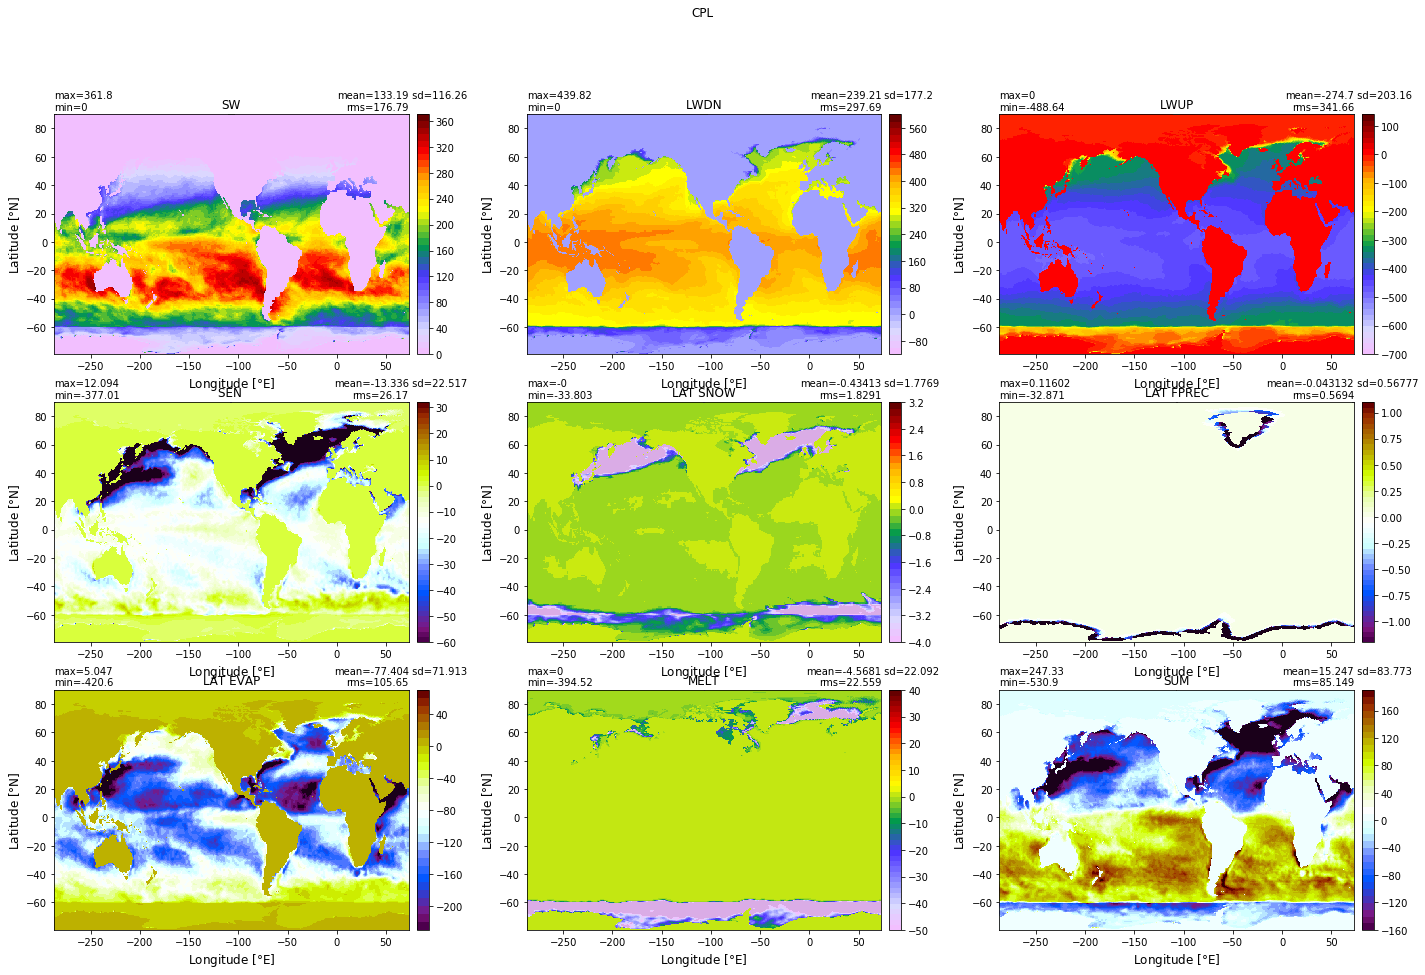

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,15))
ax1 = ax.flatten()
plt.suptitle('CPL')
dummy = np.ma.masked_where(grd.wet == 0, sw_cpl)
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], nbins=50, title='SW', clim=(0,361))
xyplot(lwdn_cpl, grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], nbins=50, title='LWDN')
xyplot(lwup_cpl, grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], nbins=50, title='LWUP')
xyplot(sen_cpl, grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], nbins=50, title='SEN ')
xyplot(-snow * latent_heat_fusion, grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], 
       nbins=50, title='LAT SNOW')
xyplot(-rofi * latent_heat_fusion, grd.geolon, grd.geolat, grd.area_t, axis=ax1[5], 
       nbins=50, title='LAT FPREC')
xyplot(lat_cpl, grd.geolon, grd.geolat, grd.area_t, axis=ax1[6], nbins=50, title='LAT EVAP')
xyplot(melth_cpl, grd.geolon, grd.geolat, grd.area_t, axis=ax1[7], nbins=50, title='MELT')
total = sw_cpl + lwdn_cpl + lwup_cpl -(snow * latent_heat_fusion) - (rofi * latent_heat_fusion) +\
        lat_cpl + melth_cpl
xyplot(total, grd.geolon, grd.geolat, grd.area_t, axis=ax1[8], nbins=50, title='SUM')

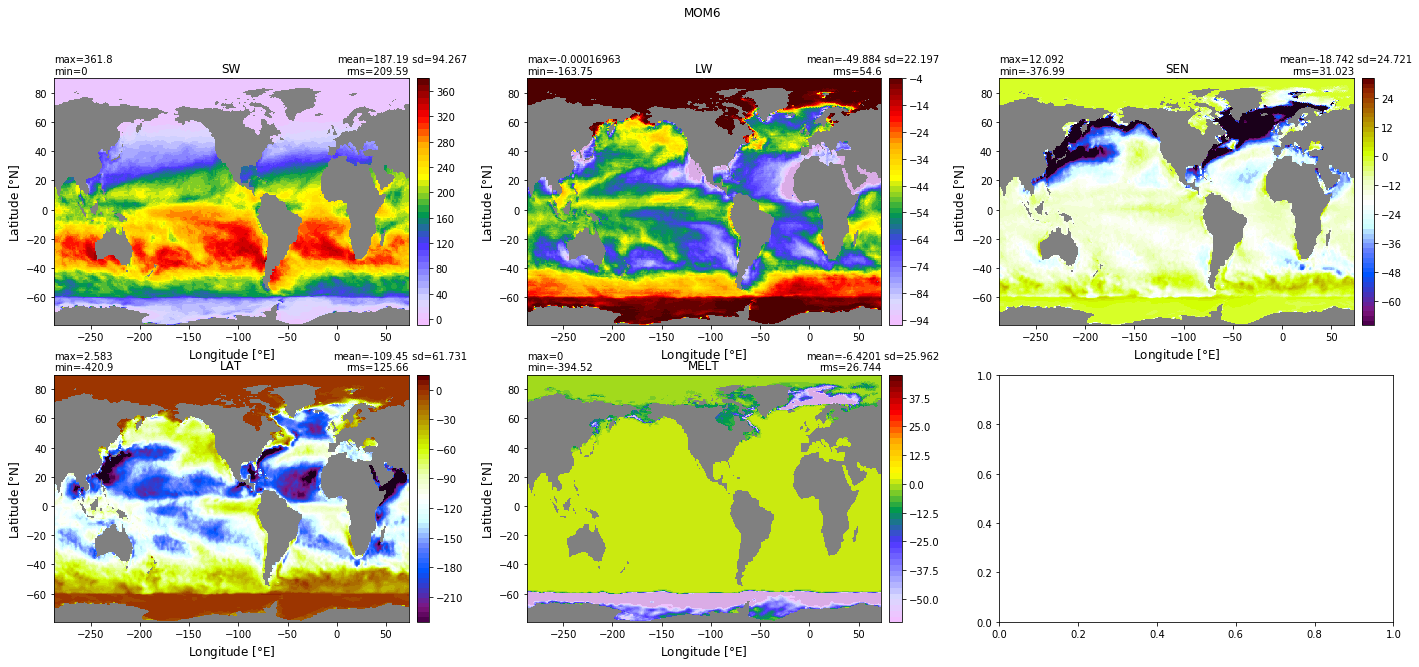

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24,10))
ax1 = ax.flatten()
plt.suptitle('MOM6')
xyplot(sw_mom, grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], nbins=50, title='SW')
xyplot(lw_mom, grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], nbins=50, title='LW')
xyplot(sen_mom, grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], nbins=50, title='SEN')
xyplot(lat_mom, grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], nbins=50, title='LAT')
xyplot(melth_mom, grd.geolon, grd.geolat, grd.area_t, axis=ax1[4], nbins=50, title='MELT')